MRIDUL HARISH, CED18I034, PROBLEM SET 7

Q1 - Implement the Naïve Bayes Classifier on the below given dataset. Test record for the given
dataset is (Rainy, Cool, Normal, True). Also test the same on a large dataset with a sample
test record.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [6]:
golf_df=pd.read_csv("golf-dataset.csv")
golf_df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [7]:
golf_df.loc[len(golf_df)]=['Rainy','Cool','Normal',True,'No']

In [8]:
train_x=golf_df.iloc[:,[0,1,2,3]].values
train_y=golf_df.iloc[:,-1].values

In [9]:
train_x

array([['Rainy', 'Hot', 'High', False],
       ['Rainy', 'Hot', 'High', True],
       ['Overcast', 'Hot', 'High', False],
       ['Sunny', 'Mild', 'High', False],
       ['Sunny', 'Cool', 'Normal', False],
       ['Sunny', 'Cool', 'Normal', True],
       ['Overcast', 'Cool', 'Normal', True],
       ['Rainy', 'Mild', 'High', False],
       ['Rainy', 'Cool', 'Normal', False],
       ['Sunny', 'Mild', 'Normal', False],
       ['Rainy', 'Mild', 'Normal', True],
       ['Overcast', 'Mild', 'High', True],
       ['Overcast', 'Hot', 'Normal', False],
       ['Sunny', 'Mild', 'High', True],
       ['Rainy', 'Cool', 'Normal', True]], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(len(train_x[0])):
    train_x[:,i] = le.fit_transform(train_x[:,i])

Removing the last row from both data and label before training the dataset

In [11]:
test_x=train_x[-1]
test_x

array([1, 0, 1, 1], dtype=object)

In [12]:
train_x=train_x[:-1]
train_x

array([[1, 1, 0, 0],
       [1, 1, 0, 1],
       [0, 1, 0, 0],
       [2, 2, 0, 0],
       [2, 0, 1, 0],
       [2, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 2, 0, 0],
       [1, 0, 1, 0],
       [2, 2, 1, 0],
       [1, 2, 1, 1],
       [0, 2, 0, 1],
       [0, 1, 1, 0],
       [2, 2, 0, 1]], dtype=object)

In [13]:
train_y=train_y[:-1]

In [14]:
classifier = GaussianNB()
classifier.fit(train_x, train_y)

GaussianNB()

In [15]:
pred_y=classifier.predict([test_x])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [16]:
pred_y

array(['Yes'], dtype='<U3')

Inference : The result for the record (Rainy, Cool, Normal, True) is predicted as 'YES' by the naive bayes classifier trained on the given dataset.

Testing it with a larger dataset

In [17]:
heart_df=pd.read_csv("heart_2020_cleaned.csv")
heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [18]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
for col in heart_df.columns:
    #print(col , heart_df[col].dtype)
    if(heart_df[col].dtype == object):
        heart_df[col] = ord_enc.fit_transform( heart_df[[col]])
        

heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,1.0,0.0,0.0,3.0,30.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,5.0,1.0,0.0,1.0
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,8.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1.0,27.41,1.0,0.0,0.0,7.0,0.0,1.0,1.0,8.0,3.0,2.0,0.0,1.0,6.0,1.0,0.0,0.0
319791,0.0,29.84,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,1.0,4.0,5.0,1.0,0.0,0.0
319792,0.0,24.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,1.0,2.0,6.0,0.0,0.0,0.0
319793,0.0,32.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,12.0,0.0,0.0,0.0


In [19]:
heart_train_x=heart_df.iloc[:,[x for x in range(17)]].values
heart_train_y=heart_df.iloc[:,-1].values

In [20]:
heart_train_x

array([[ 0.  , 16.6 ,  1.  , ...,  5.  ,  1.  ,  0.  ],
       [ 0.  , 20.34,  0.  , ...,  7.  ,  0.  ,  0.  ],
       [ 0.  , 26.58,  1.  , ...,  8.  ,  1.  ,  0.  ],
       ...,
       [ 0.  , 24.24,  0.  , ...,  6.  ,  0.  ,  0.  ],
       [ 0.  , 32.81,  0.  , ..., 12.  ,  0.  ,  0.  ],
       [ 0.  , 46.56,  0.  , ...,  8.  ,  0.  ,  0.  ]])

Splitting the dataset into 80% training data and 20% testing data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
heart_train_x, heart_test_x, heart_train_y, heart_test_y = train_test_split(heart_train_x, heart_train_y, test_size = 0.2, random_state=42)

In [23]:
classifier = GaussianNB()
classifier.fit(heart_train_x, heart_train_y)

GaussianNB()

In [24]:
pred_y=classifier.predict(heart_test_x)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(heart_test_y, pred_y)

0.8233399521568505

Inference :  The accuracy of this model in predicting skin cancer is 82%.

Q2 - Implement the Nearest Neighbour Classifier on the given Kaggle dataset with k=7. You are
free to use built-in packages for implementation.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [27]:
fruit_df=pd.read_csv("fruit_data_with_colors.txt",  delim_whitespace=True)
fruit_df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [28]:
train_x=fruit_df.iloc[:,[0,1,2,3,4,5]].values
train_y=fruit_df.iloc[:,-1].values

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_x[:,1] = le.fit_transform(train_x[:,1])
train_x[:,2] = le.fit_transform(train_x[:,2])
train_x

array([[1, 0, 3, 192, 8.4, 7.3],
       [1, 0, 3, 180, 8.0, 6.8],
       [1, 0, 3, 176, 7.4, 7.2],
       [2, 2, 4, 86, 6.2, 4.7],
       [2, 2, 4, 84, 6.0, 4.6],
       [2, 2, 4, 80, 5.8, 4.3],
       [2, 2, 4, 80, 5.9, 4.3],
       [2, 2, 4, 76, 5.8, 4.0],
       [1, 0, 0, 178, 7.1, 7.8],
       [1, 0, 0, 172, 7.4, 7.0],
       [1, 0, 0, 166, 6.9, 7.3],
       [1, 0, 0, 172, 7.1, 7.6],
       [1, 0, 0, 154, 7.0, 7.1],
       [1, 0, 2, 164, 7.3, 7.7],
       [1, 0, 2, 152, 7.6, 7.3],
       [1, 0, 2, 156, 7.7, 7.1],
       [1, 0, 2, 156, 7.6, 7.5],
       [1, 0, 2, 168, 7.5, 7.6],
       [1, 0, 1, 162, 7.5, 7.1],
       [1, 0, 1, 162, 7.4, 7.2],
       [1, 0, 1, 160, 7.5, 7.5],
       [1, 0, 1, 156, 7.4, 7.4],
       [1, 0, 1, 140, 7.3, 7.1],
       [1, 0, 1, 170, 7.6, 7.9],
       [3, 3, 7, 342, 9.0, 9.4],
       [3, 3, 7, 356, 9.2, 9.2],
       [3, 3, 7, 362, 9.6, 9.2],
       [3, 3, 5, 204, 7.5, 9.2],
       [3, 3, 5, 140, 6.7, 7.1],
       [3, 3, 5, 160, 7.0, 7.4],
       [3, 3, 5

Converting the label from continous type to int for classifier to work

In [30]:
lab_enc = preprocessing.LabelEncoder()
train_y = lab_enc.fit_transform(train_y)
train_y

array([ 0,  1,  2, 15, 14, 12, 16, 16, 25, 24, 26, 25, 23,  5,  4,  4,  3,
        8, 18, 20, 21, 19, 22, 23, 10, 10,  9, 12,  7, 16, 14, 17, 15,  9,
       10, 10, 11, 14, 12, 10, 13, 14, 17,  5,  7,  7,  6,  7,  7,  8,  6,
        7,  7,  9,  6,  7,  8,  7,  5], dtype=int64)

Splitting the dataset into 80% training dataset and 20% testing dataset

In [31]:
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size = 0.2, random_state=42)

Training using the 80% dataset

In [32]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=7)

Testing the model using the dataset

In [34]:
print(knn.score(test_x, test_y))

0.08333333333333333


Trying for more values of k

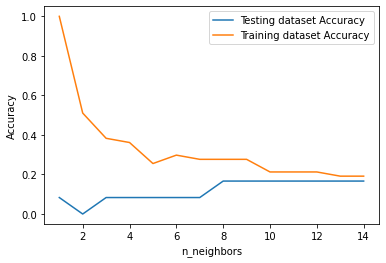

In [36]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
     
    train_accuracy[i] = knn.score(train_x, train_y)
    test_accuracy[i] = knn.score(test_x, test_y)
 

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

Question 3 - Develop an application that simulates the working of Genetic Algorithm comprising of Basic
Operators such as Selection, Crossover and Mutation to optimize the objective function max
f(x)= x^3-2x^2+x within a range of (0,31). You are free to use any inbuilt / open-source packages
supported in the programming platform.

In [37]:
import random

ITERATION 1 :-

Random Initilization of Population

In [38]:
best=100
populations =([[random.randint(0,1) for x in range(5)] for i in range(4)])
print(populations)

[[1, 1, 1, 0, 1], [0, 1, 0, 1, 0], [1, 1, 0, 0, 1], [0, 1, 0, 0, 0]]


Fitness Evaluation

In [39]:
def fitness_evaluation(populations,best,verbose=0) :
    fit_value = []
    fit_score=[]
    for i in range(len(populations)) :
        chromosome_value=0
        
        for j in range(len(populations[i])-1,-1,-1) :
            chromosome_value += populations[i][j]*(2**(len(populations[i])-1-j))
        fit_value.append((chromosome_value**3)-2*(chromosome_value**2) + (chromosome_value) )
        
        if(verbose==0):
            print("Population Item = ",populations[i],"\t","Chromosome Value = ",chromosome_value,"\t","Fit Value = ",fit_value[i])
    fit_value, populations = zip(*sorted(zip(fit_value, populations) , reverse = True))
    return populations,fit_value[0]

    
populations,best=fitness_evaluation(populations,best)

Population Item =  [1, 1, 1, 0, 1] 	 Chromosome Value =  29 	 Fit Value =  22736
Population Item =  [0, 1, 0, 1, 0] 	 Chromosome Value =  10 	 Fit Value =  810
Population Item =  [1, 1, 0, 0, 1] 	 Chromosome Value =  25 	 Fit Value =  14400
Population Item =  [0, 1, 0, 0, 0] 	 Chromosome Value =  8 	 Fit Value =  392


Selection Process

In [40]:
def selection_process(populations,verbose=0):
    parents=populations[0:2]
    if(verbose==0):
        print(parents)
    return parents
parents=selection_process(populations)

([1, 1, 1, 0, 1], [1, 1, 0, 0, 1])


Crossover Process

In [41]:
def crossover_process(parents,verbose=0) :
    cross_point = random.randint(0,len(parents[0])-1)
    parents=parents + tuple([(parents[0][0:cross_point +1] +parents[1][cross_point+1:len(parents[0])])])
    parents =parents+ tuple([(parents[1][0:cross_point +1] +parents[0][cross_point+1:len(parents[0])])])
    
    if(verbose==0):
        print(parents)
    return parents
parents=crossover_process(parents)

([1, 1, 1, 0, 1], [1, 1, 0, 0, 1], [1, 1, 0, 0, 1], [1, 1, 1, 0, 1])


Mutation Process

In [42]:
def mutation_process(populations,parents,verbose=0) :
    flip = random.randint(0,100)
    if flip == 50 :
        x=random.randint(0,len(parents)-1)
        y = random.randint(0,len(parents[0])-1)
        parents[x][y] = 1-parents[x][y]
    populations = parents
    if(verbose==0):
        print(populations)
    return populations

populations=mutation_process(populations,parents)

([1, 1, 1, 0, 1], [1, 1, 0, 0, 1], [1, 1, 0, 0, 1], [1, 1, 1, 0, 1])


Evolution Process : Repeat the process of Fitness Evaluation -> Selection -> Crossover -> Mutation -> Fitness Evalution.. over  multiple iterations to find the best values or repeat until the solution converges to provide the max value for the function

In [43]:
verbose=1
for i in range(1000) :
    populations,best=fitness_evaluation(populations,best,verbose)
    parents=selection_process(populations,verbose)
    parents=crossover_process(parents,verbose)
    populations=mutation_process(populations,parents,verbose)
    #print(i,"\n\n")
    if(i%50==0):
        print("Iteration = ",i,"\t","Best = ",best)
    
print("Final Max Score/Value of the function:")
print(best)
print("Soltuion Chromosome Sequence:")
print(populations[0])

Iteration =  0 	 Best =  22736
Iteration =  50 	 Best =  27900
Iteration =  100 	 Best =  27900
Iteration =  150 	 Best =  27900
Iteration =  200 	 Best =  27900
Iteration =  250 	 Best =  27900
Iteration =  300 	 Best =  27900
Iteration =  350 	 Best =  27900
Iteration =  400 	 Best =  27900
Iteration =  450 	 Best =  27900
Iteration =  500 	 Best =  27900
Iteration =  550 	 Best =  27900
Iteration =  600 	 Best =  27900
Iteration =  650 	 Best =  27900
Iteration =  700 	 Best =  27900
Iteration =  750 	 Best =  27900
Iteration =  800 	 Best =  27900
Iteration =  850 	 Best =  27900
Iteration =  900 	 Best =  27900
Iteration =  950 	 Best =  27900
Final Max Score/Value of the function:
27900
Soltuion Chromosome Sequence:
[1, 1, 1, 1, 1]


Inference : The Above Algorithm first finds the max value as 8400 among the initial population,after which the algorithm slowly converges to the max of 27900 (at aroud 500 to 550 iterations )which occurs for x=31 and the solution as presented is binary digits of 5 1's.This no of iterations is subjective many factors such as initial population ,selection process,chosing crossover point and mutation bits.